In [36]:
import sqlite3
import pandas as pd
import numpy as np

In [37]:
conn=sqlite3.connect('cancer_datas.db')
cursor=conn.cursor()

In [38]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patients (
    id INTEGER PRIMARY KEY,
    diagnosis TEXT
)
""")

In [39]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS Measurements (
    id INTEGER,
    radius_mean REAL,
    texture_mean REAL,
    perimeter_mean REAL,
    area_mean REAL,
    smoothness_mean REAL,
    compactness_mean REAL,
    concavity_mean REAL,
    concave_points_mean REAL,
    symmetry_mean REAL,
    fractal_dimension_mean REAL,
    radius_se REAL,
    texture_se REAL,
    perimeter_se REAL,
    area_se REAL,
    smoothness_se REAL,
    compactness_se REAL,
    concavity_se REAL,
    concave_points_se REAL,
    symmetry_se REAL,
    fractal_dimension_se REAL,
    radius_worst REAL,
    texture_worst REAL,
    perimeter_worst REAL,
    area_worst REAL,
    smoothness_worst REAL,
    compactness_worst REAL,
    concavity_worst REAL,
    concave_points_worst REAL,
    symmetry_worst REAL,
    fractal_dimension_worst REAL,
    FOREIGN KEY (id) REFERENCES Patients(id)
)
""")
conn.commit()




In [40]:
cancer_data = pd.read_csv('cancer_data.csv')

In [41]:
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [43]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           567 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [44]:
patients_data = cancer_data[['id', 'diagnosis']]
measurements_data = cancer_data.drop(columns=['diagnosis'])
patients_data.to_sql('Patients', conn, if_exists='replace', index=False)
measurements_data.to_sql('Measurements', conn, if_exists='replace', index=False)
query = """
SELECT p.id, p.diagnosis, m.radius_mean, m.texture_mean
FROM Patients p
JOIN Measurements m ON p.id = m.id
LIMIT 5
"""
sample_result = pd.read_sql_query(query, conn)
print(sample_result)


         id diagnosis  radius_mean  texture_mean
0    842302         M        17.99         10.38
1    842517         M        20.57         17.77
2  84300903         M        19.69         21.25
3  84348301         M        11.42         20.38
4  84358402         M        20.29         14.34


In [45]:
print(cancer_data['diagnosis'].value_counts(normalize=True))

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [46]:
cancer_data.duplicated().sum()

0

In [47]:
cancer_data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [48]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  0
smoothness_mean            1
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              1
fractal_dimension_mean     1
radius_se                  0
texture_se                 1
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             1
concavity_se               2
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X = cancer_data.drop(columns = ['id', 'diagnosis'])
y = cancer_data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")


Train size: 455, Test size: 114


In [50]:
from ydata_profiling import ProfileReport

profile = ProfileReport(cancer_data, title='Cancer Data Profile', explorative=True)
profile.to_file('cancer_data_profile.html')


Export report to file: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


In [51]:
%matplotlib inline

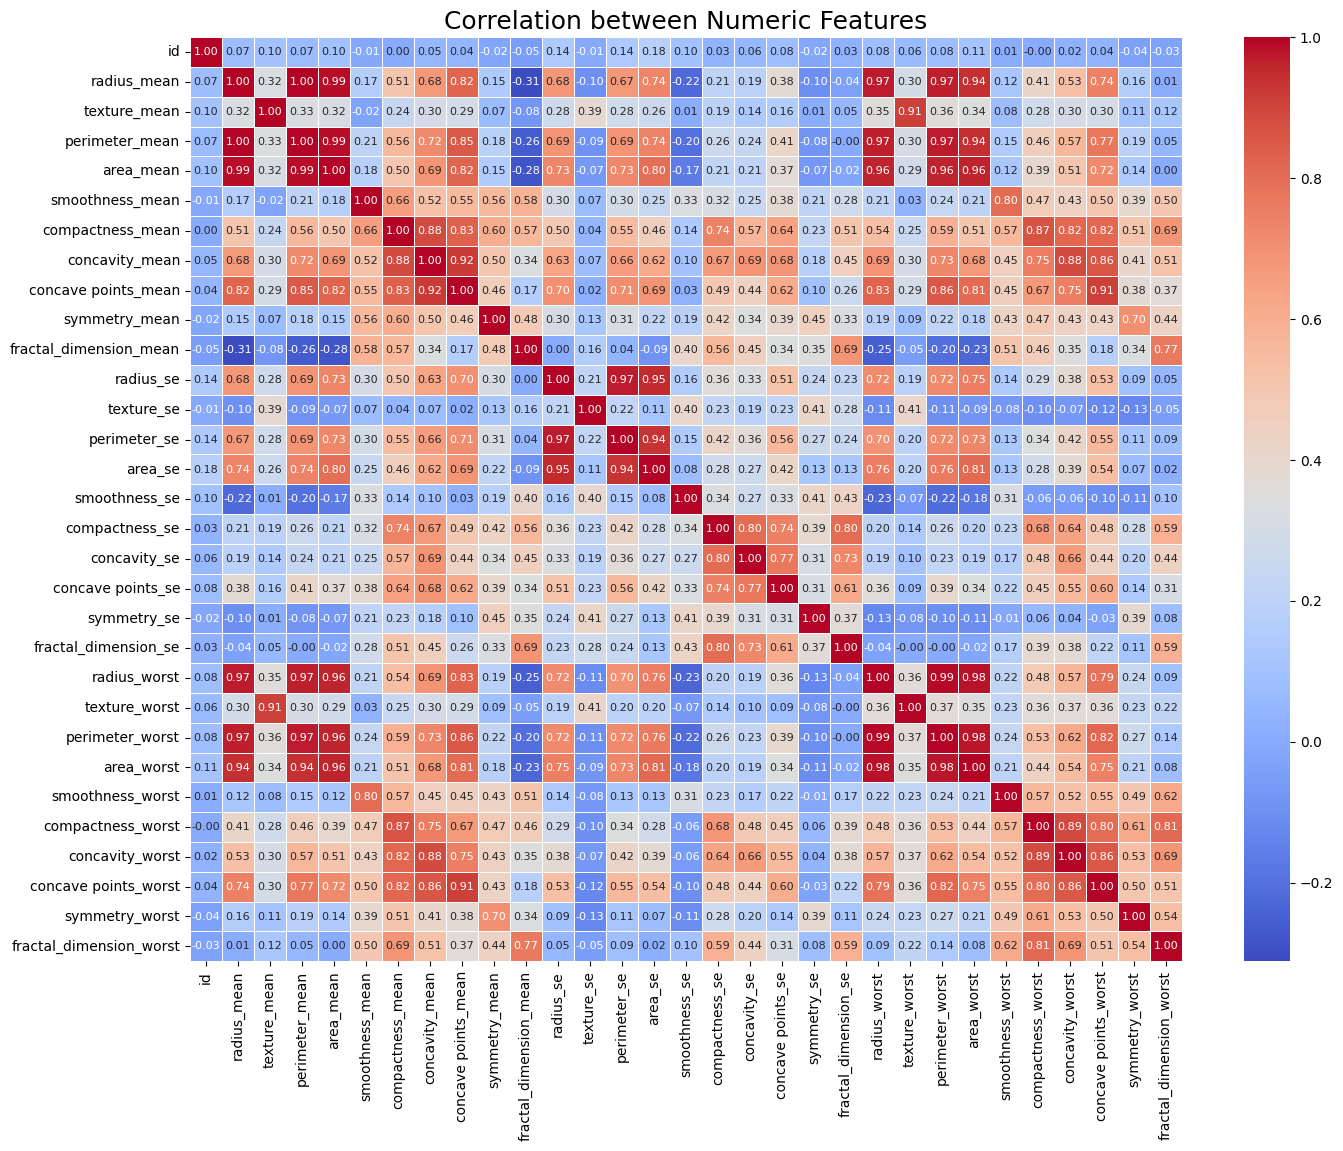

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_data = cancer_data.select_dtypes(include=['number'])
corr = numeric_data.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm',
            annot_kws={"size": 8})
plt.title("Correlation between Numeric Features", fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()


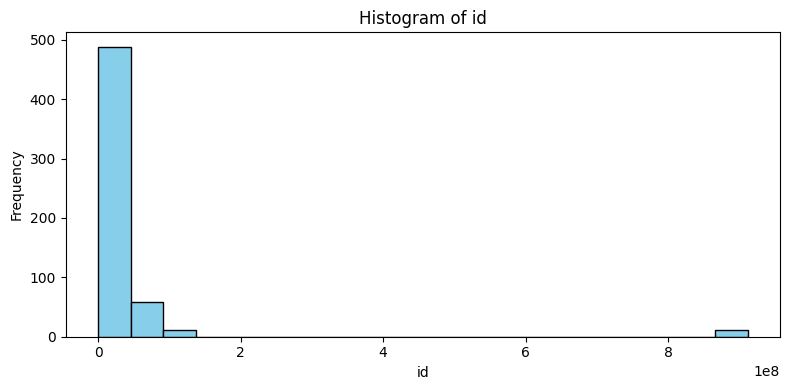

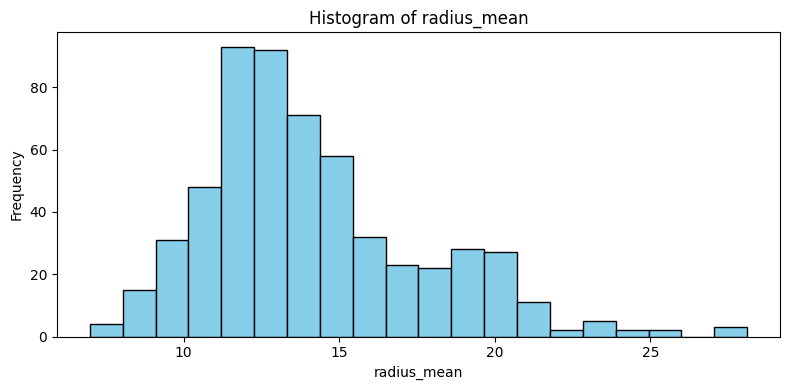

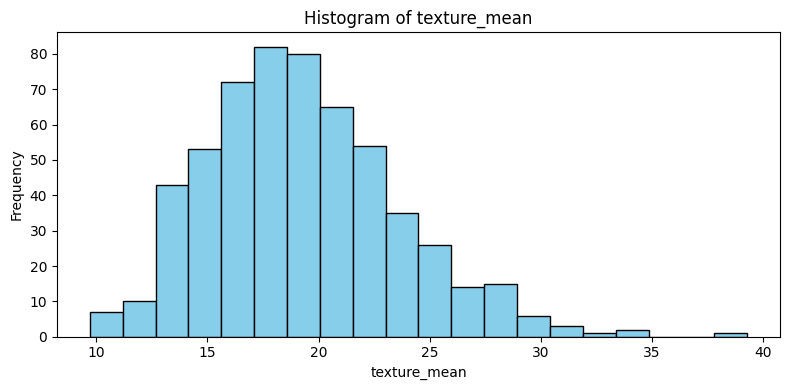

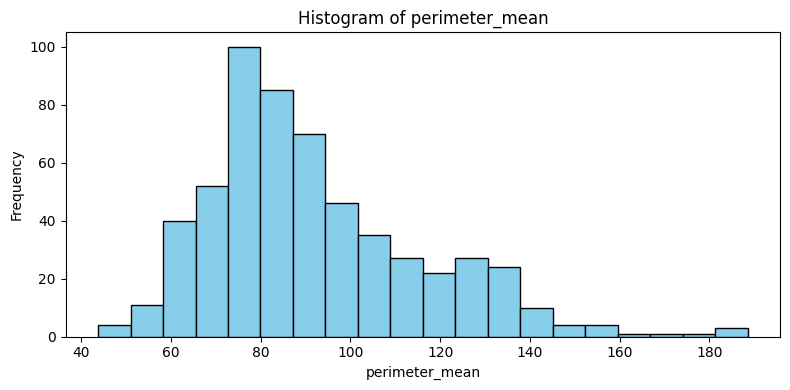

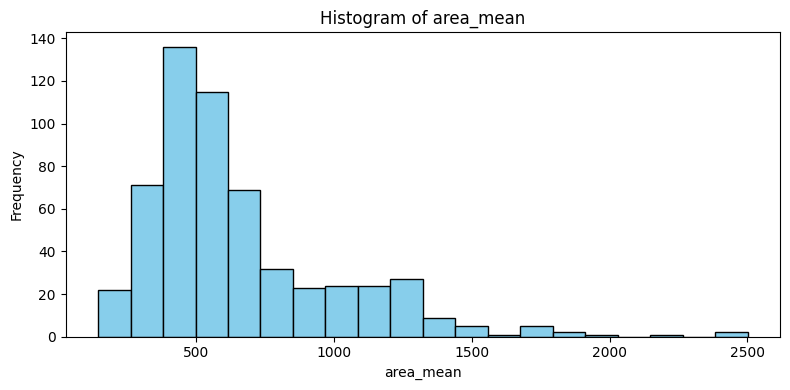

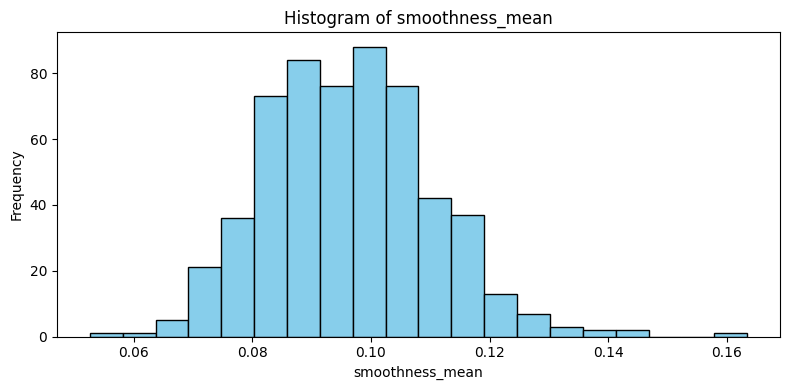

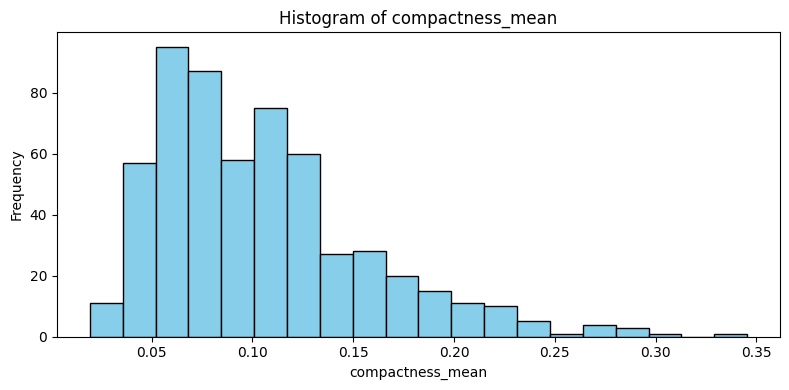

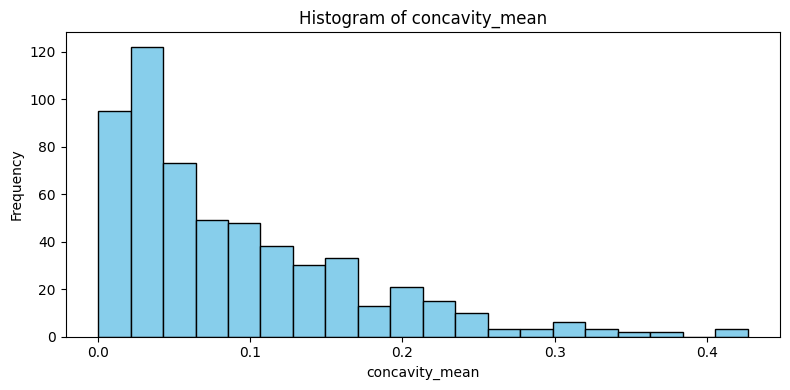

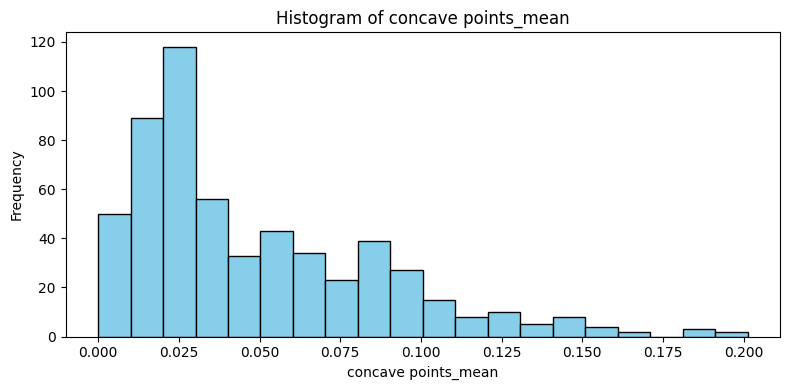

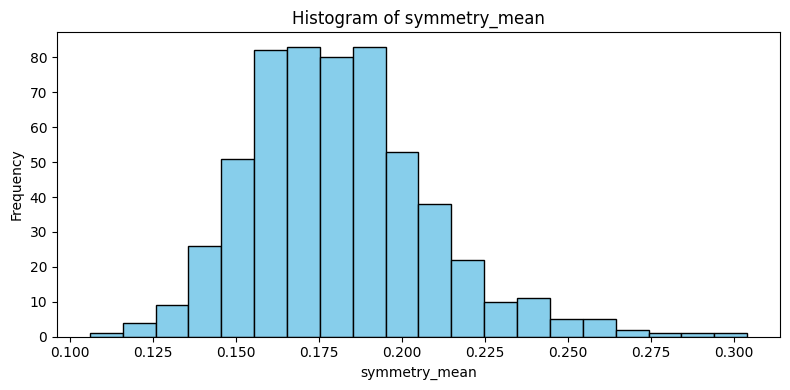

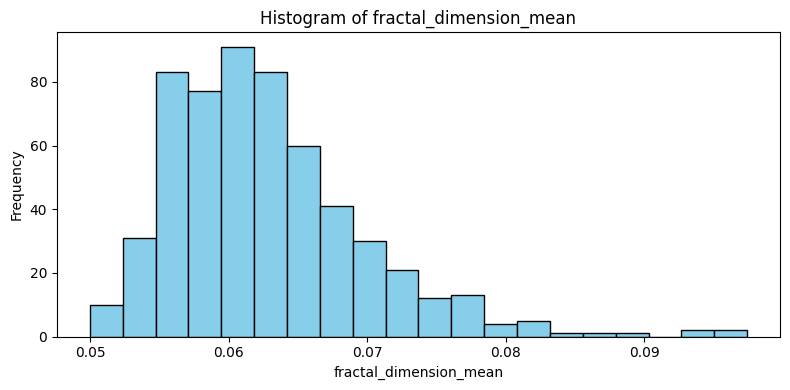

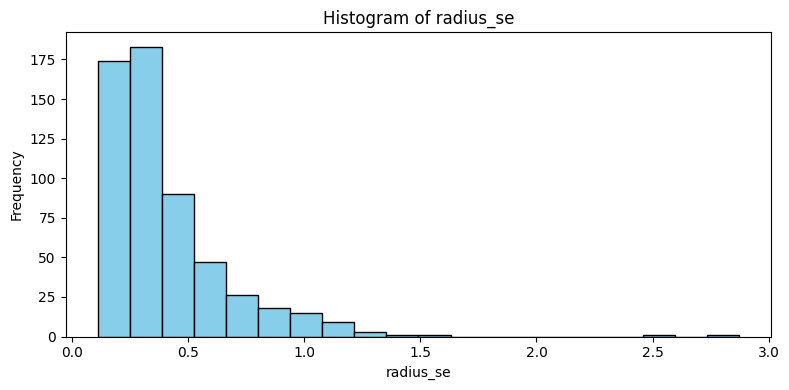

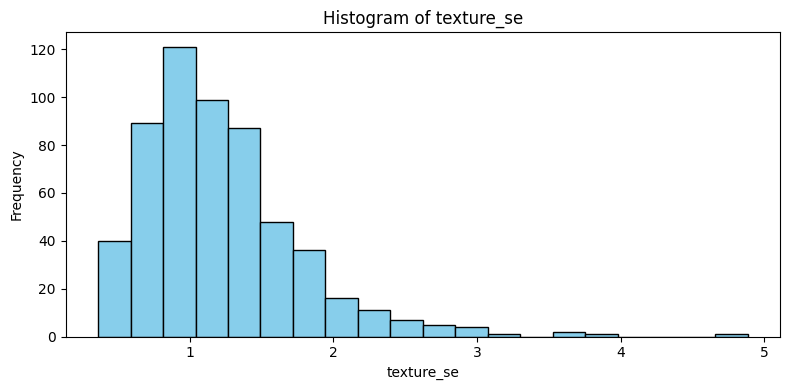

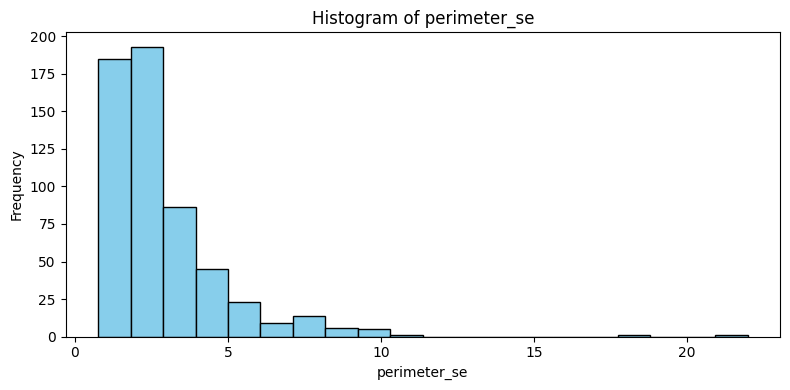

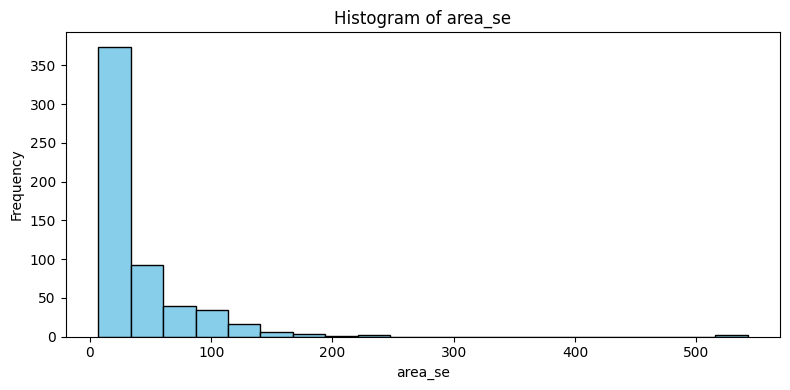

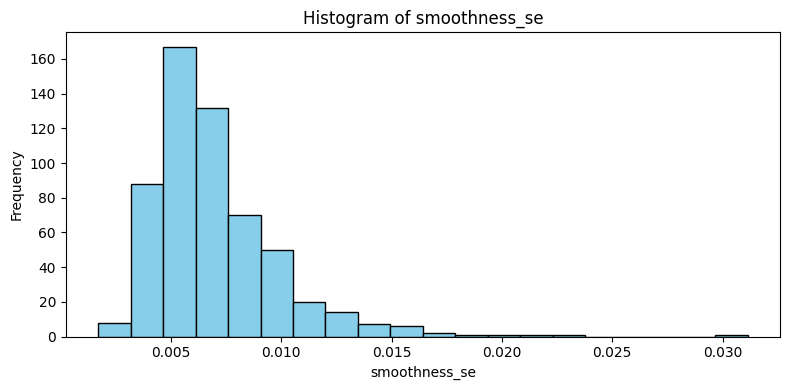

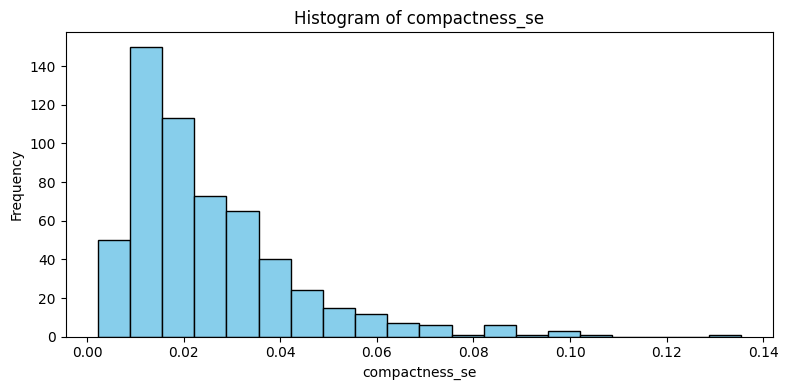

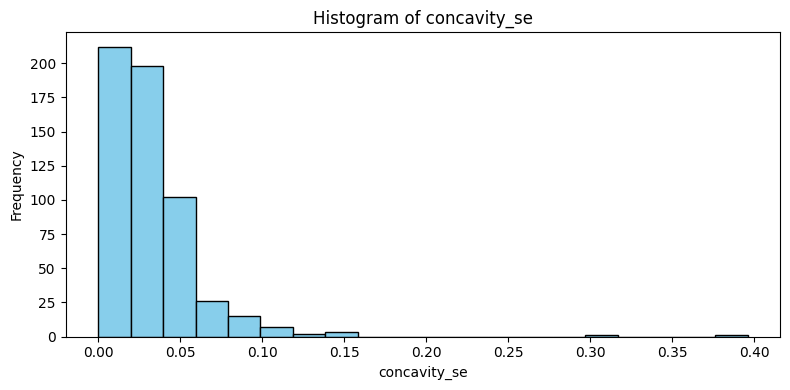

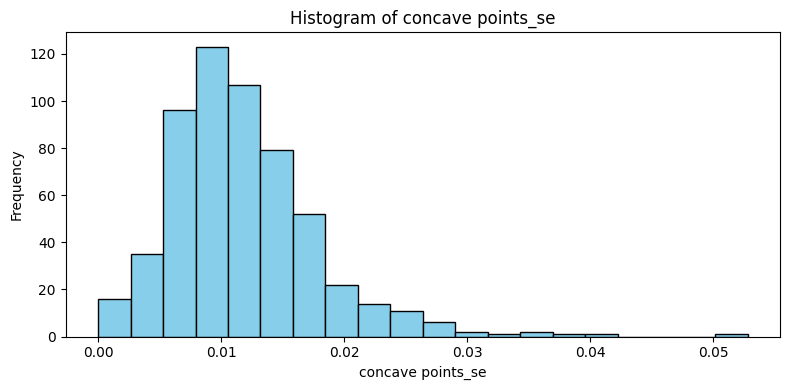

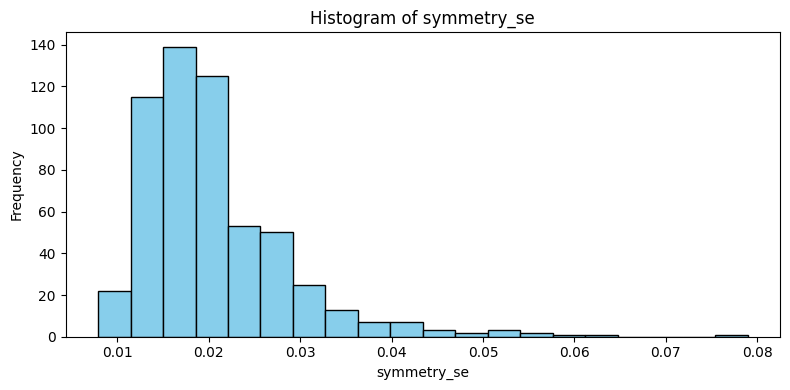

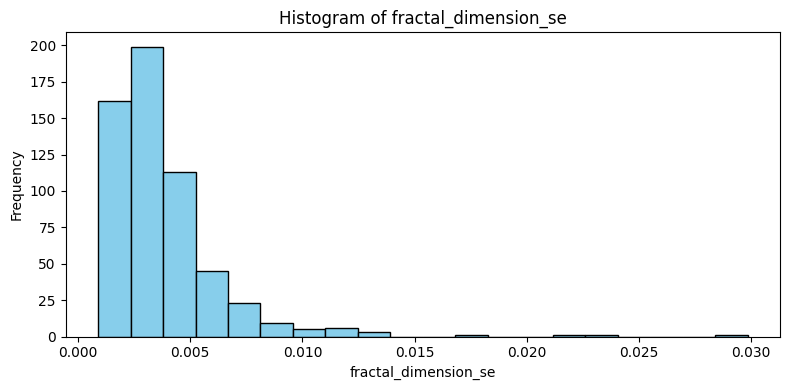

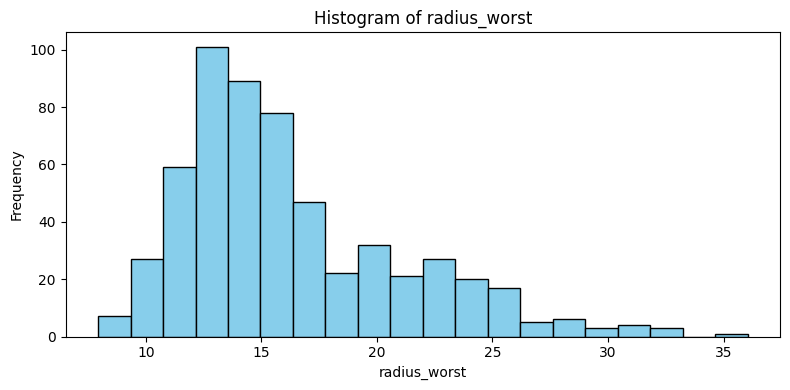

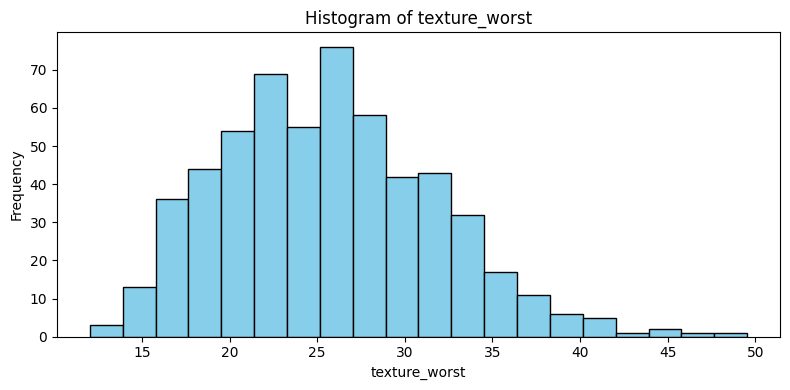

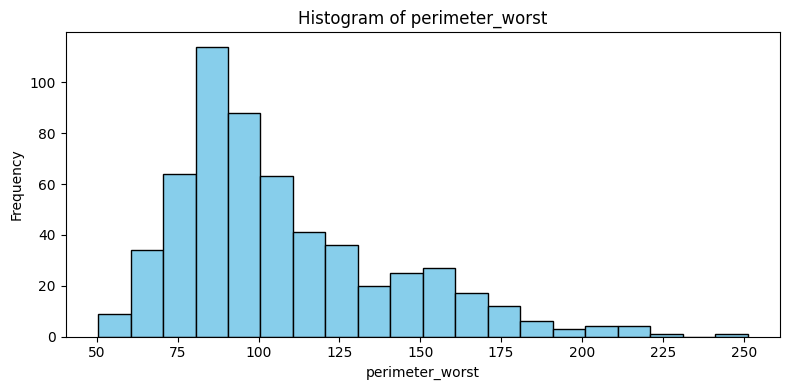

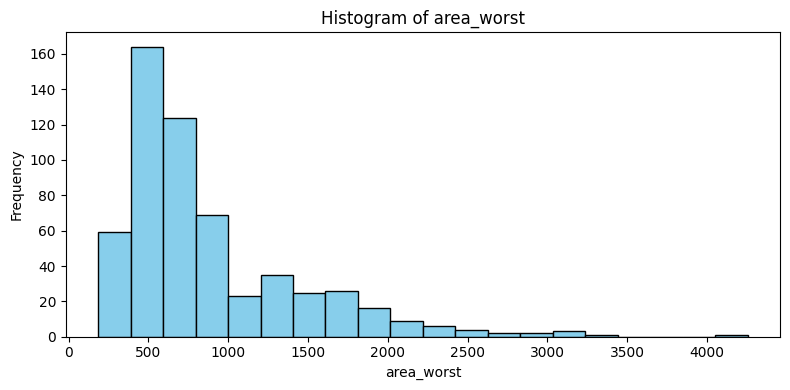

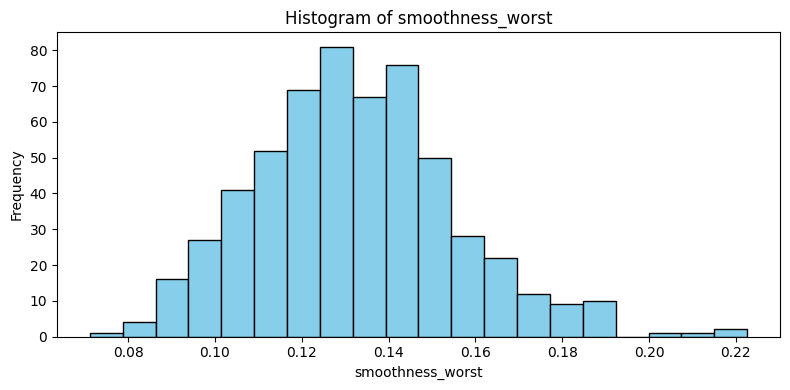

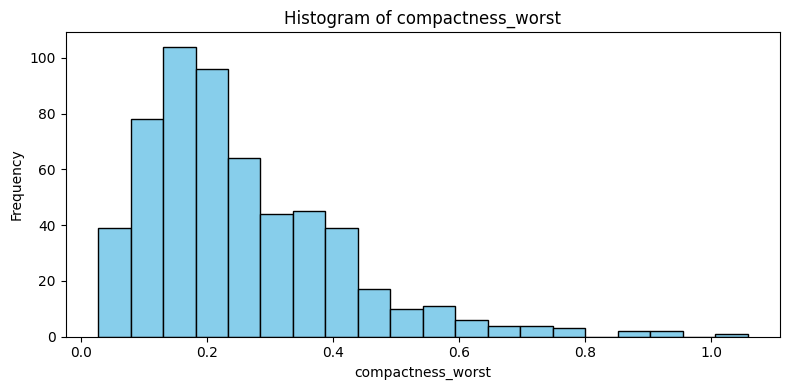

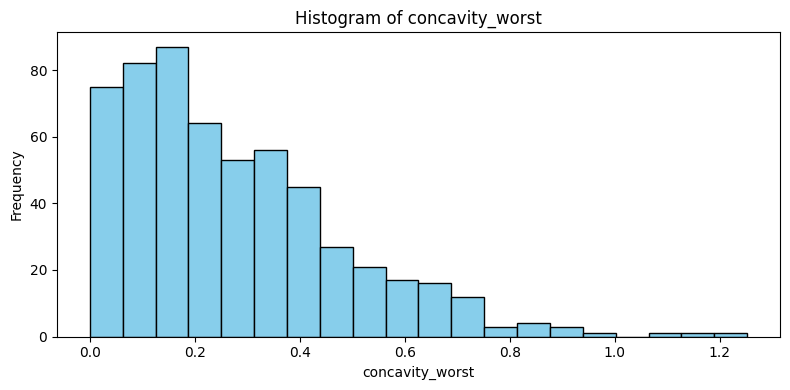

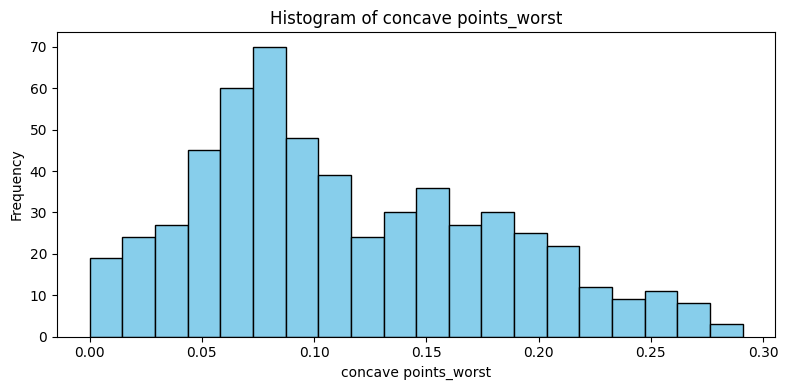

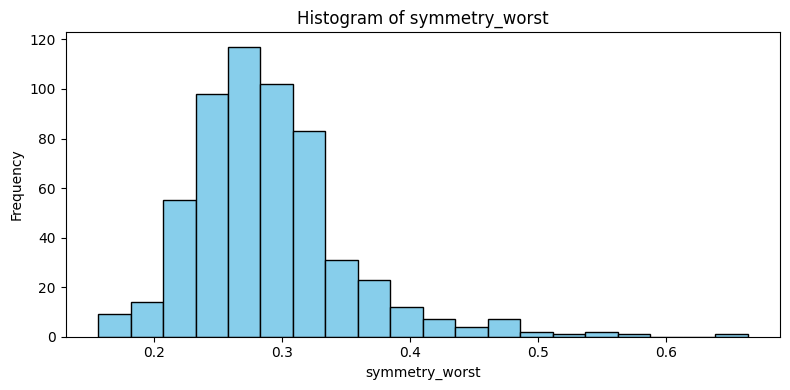

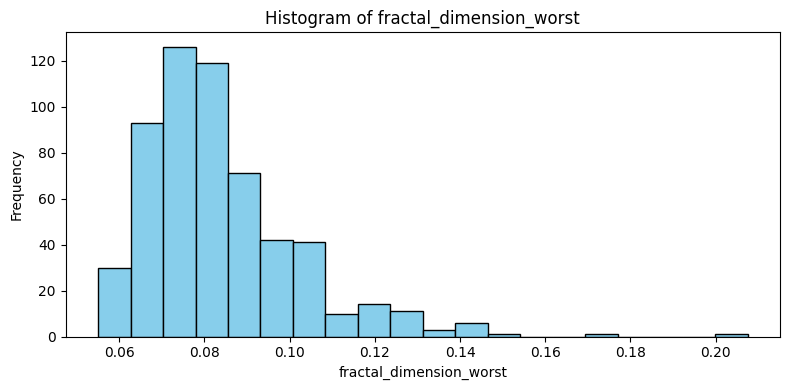

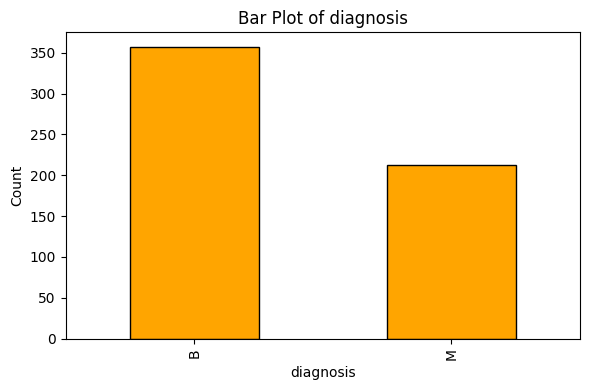

In [53]:
import matplotlib.pyplot as plt
def generate_graphs(cancer_data):
    num_cols = cancer_data.select_dtypes(include=['float64', 'int64']).columns
    cat_cols = cancer_data.select_dtypes(include=['object']).columns
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        plt.hist(cancer_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()
    for col in cat_cols:
        plt.figure(figsize=(6, 4))
        cancer_data[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Bar Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
generate_graphs(cancer_data)

In [54]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import numpy as np
import mlflow
import mlflow.sklearn

X = cancer_data.drop(columns=['id', 'diagnosis'])
y = (cancer_data['diagnosis'] == 'M').astype(int)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
for cv in [3, 10]:
    cv_scores = cross_val_score(logreg_pipeline, X, y, cv=cv, scoring='f1')
    print(f"CV-{cv} F1-scores: {cv_scores}")
    print(f"Mean F1-score: {np.mean(cv_scores)}, Std: {np.std(cv_scores)}")
    y_pred = cross_val_predict(logreg_pipeline, X, y, cv=cv)
    cm = confusion_matrix(y, y_pred)
    print(f"Confusion Matrix (CV-{cv}):\n", cm)
    print("Classification Report:\n", classification_report(y, y_pred))

    tp, fn, fp, tn = cm.ravel()

    with mlflow.start_run():
        mlflow.log_param('cross_validation_folds', cv)
        mlflow.log_metric('mean_f1_score', np.mean(cv_scores))
        mlflow.log_metric('std_f1_score', np.std(cv_scores))

        mlflow.log_metric('true_positives', tp)
        mlflow.log_metric('false_negatives', fn)
        mlflow.log_metric('false_positives', fp)
        mlflow.log_metric('true_negatives', tn)

        report = classification_report(y, y_pred, output_dict=True)
        mlflow.log_metric('accuracy', report['accuracy'])
        mlflow.log_metric('precision', report['macro avg']['precision'])
        mlflow.log_metric('recall', report['macro avg']['recall'])
        mlflow.log_metric('f1_score', report['macro avg']['f1-score'])

        # Log the model
        #mlflow.sklearn.log_model(logreg_pipeline, 'logreg_model')


CV-3 F1-scores: [0.97183099 0.96350365 0.96503497]
Mean F1-score: 0.9667898668618315, Std: 0.0036190139263254342
Confusion Matrix (CV-3):
 [[351   6]
 [  8 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       357
           1       0.97      0.96      0.97       212

    accuracy                           0.98       569
   macro avg       0.97      0.97      0.97       569
weighted avg       0.98      0.98      0.98       569

CV-10 F1-scores: [0.97777778 0.97674419 0.97560976 0.95       0.97560976 0.97560976
 0.92682927 1.         1.         0.97674419]
Mean F1-score: 0.9734924686456166, Std: 0.02046364755409401
Confusion Matrix (CV-10):
 [[354   3]
 [  8 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       357
           1       0.99      0.96      0.97       212

    accuracy                           0.98       569
   ma

In [55]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
import mlflow
import mlflow.sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np
import warnings
warnings.filterwarnings("ignore")
X = cancer_data.drop(columns=['id', 'diagnosis'])
y = (cancer_data['diagnosis'] == 'M').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RidgeClassifier": RidgeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
}
for name, clf in classifiers.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='f1')
    print(f"{name} Cross-Validation Results:")
    print(f"Mean F1-Score: {cv_scores.mean():.4f}")
    print(f"Standard Deviation: {cv_scores.std():.4f}")
    with mlflow.start_run(run_name=name):
        mlflow.log_param("Model", name)
        mlflow.log_metric("Mean_F1_Score", cv_scores.mean())
        mlflow.log_metric("Std_F1_Score", cv_scores.std())
        mlflow.sklearn.log_model(pipeline, f'{name}_model')
        print(f"Logged {name} model to MLFlow.\n")


LogisticRegression Cross-Validation Results:
Mean F1-Score: 0.9640
Standard Deviation: 0.0265


2024/12/18 17:17:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged LogisticRegression model to MLFlow.

RidgeClassifier Cross-Validation Results:
Mean F1-Score: 0.9399
Standard Deviation: 0.0282


2024/12/18 17:18:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RidgeClassifier model to MLFlow.

RandomForestClassifier Cross-Validation Results:
Mean F1-Score: 0.9490
Standard Deviation: 0.0337


2024/12/18 17:18:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged RandomForestClassifier model to MLFlow.

XGBClassifier Cross-Validation Results:
Mean F1-Score: nan
Standard Deviation: nan


2024/12/18 17:18:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBClassifier model to MLFlow.



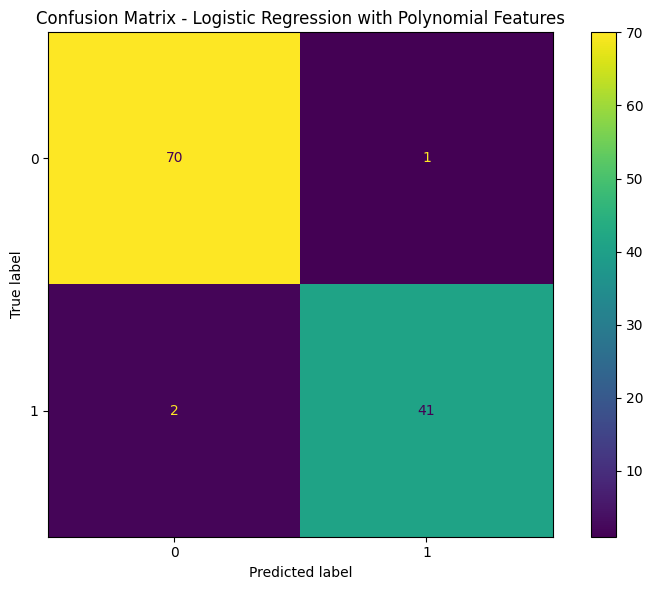

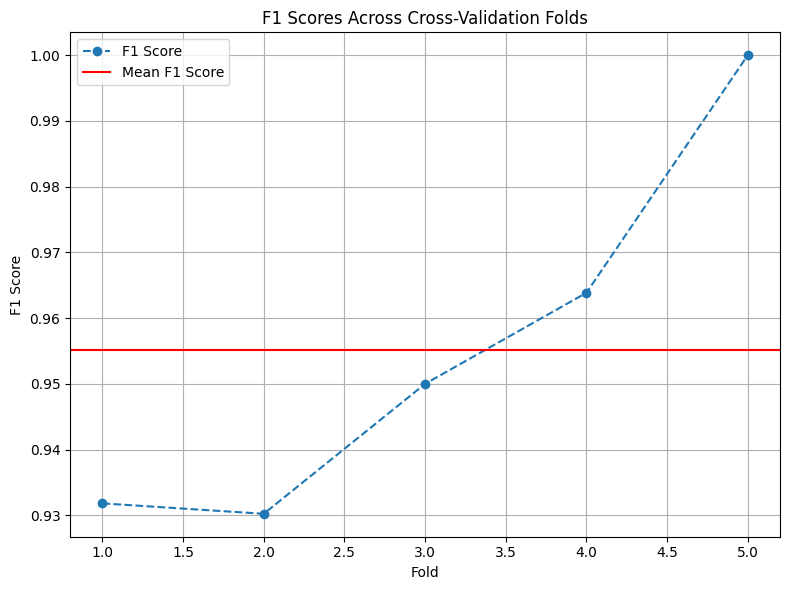



Mean F1: 0.9551812323288928
Standard Deviation of F1: 0.02560889352545841


In [56]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import mlflow
import numpy as np
import matplotlib.pyplot as plt
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_imputed)
logreg_pipeline_poly = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=5000, solver='lbfgs'))
])
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
logreg_pipeline_poly.fit(X_train, y_train)
y_pred = logreg_pipeline_poly.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title("Confusion Matrix - Logistic Regression with Polynomial Features")
plt.tight_layout()
plt.show()
print("\n")
with mlflow.start_run(run_name="Feature_Engineering"):
    cv_scores = cross_val_score(logreg_pipeline_poly, X_poly, y, cv=5, scoring='f1')
    mean_f1 = np.mean(cv_scores)
    std_f1 = np.std(cv_scores)
    mlflow.log_metric("mean_f1_score", mean_f1)
    mlflow.log_metric("std_f1_score", std_f1)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label="F1 Score")
    plt.axhline(y=mean_f1, color='r', linestyle='-', label="Mean F1 Score")
    plt.title("F1 Scores Across Cross-Validation Folds")
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    print("\n")
    print("Mean F1:", mean_f1)
    print("Standard Deviation of F1:", std_f1)


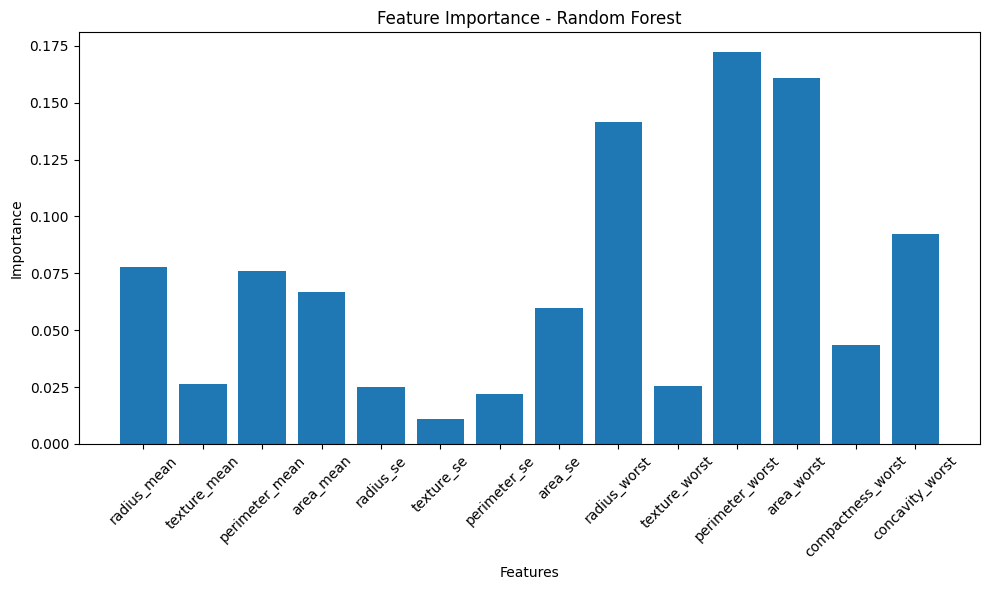

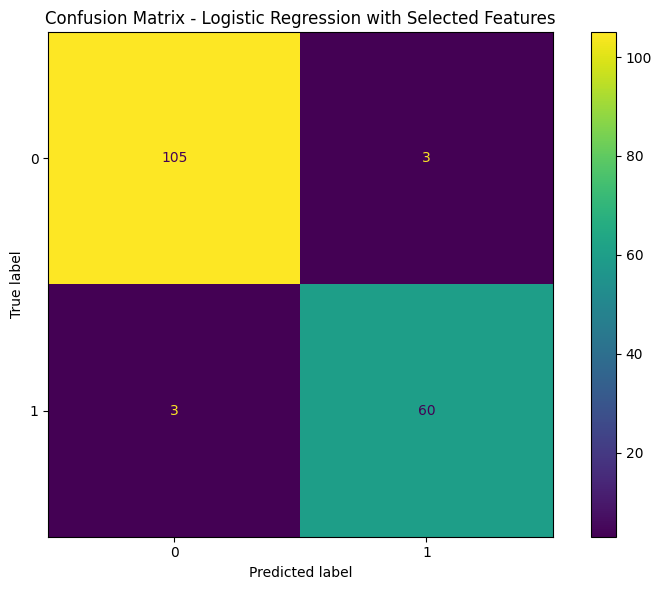

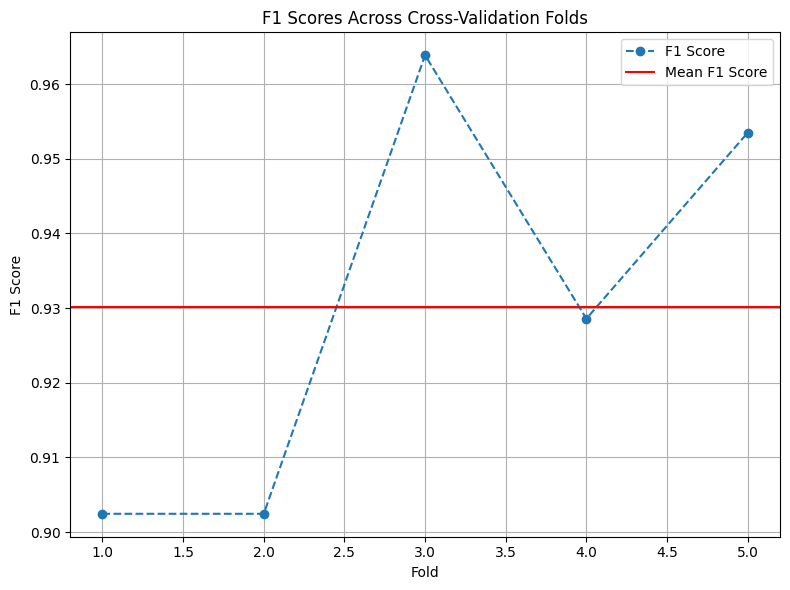



Mean F1: 0.9301586542263374


In [57]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import mlflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X)
selected_columns_var = X.columns[var_thresh.get_support()]
X_filtered_var = X[selected_columns_var]
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_filtered_var, y)
feature_importances = rf.feature_importances_
important_features = selected_columns_var[feature_importances > 0.01]
X_selected = X_filtered_var[important_features]
plt.figure(figsize=(10, 6))
plt.bar(important_features, feature_importances[feature_importances > 0.01])
plt.xticks(rotation=45)
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
print("\n")
categorical_cols = X_selected.select_dtypes(include=['object']).columns
numerical_cols = X_selected.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)
logreg_pipeline_fs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
logreg_pipeline_fs.fit(X_train, y_train)
y_pred = logreg_pipeline_fs.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title("Confusion Matrix - Logistic Regression with Selected Features")
plt.tight_layout()
plt.show()
print("\n")
with mlflow.start_run(run_name="Feature_Selection"):
    cv_scores = cross_val_score(logreg_pipeline_fs, X_selected, y, cv=5, scoring='f1')
    mean_f1 = np.mean(cv_scores)
    mlflow.log_metric("mean_f1_score", mean_f1)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', label="F1 Score")
    plt.axhline(y=mean_f1, color='r', linestyle='-', label="Mean F1 Score")
    plt.title("F1 Scores Across Cross-Validation Folds")
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    print("\n")
    print("Mean F1:", mean_f1)


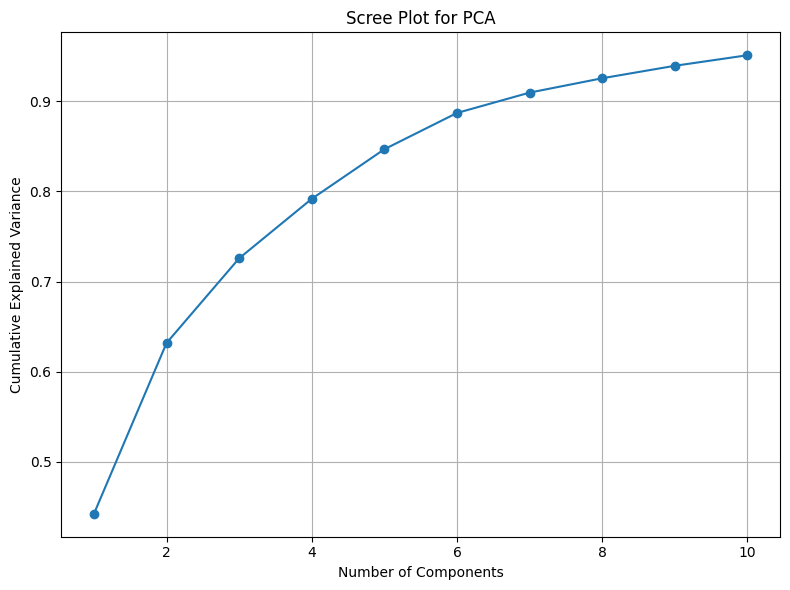

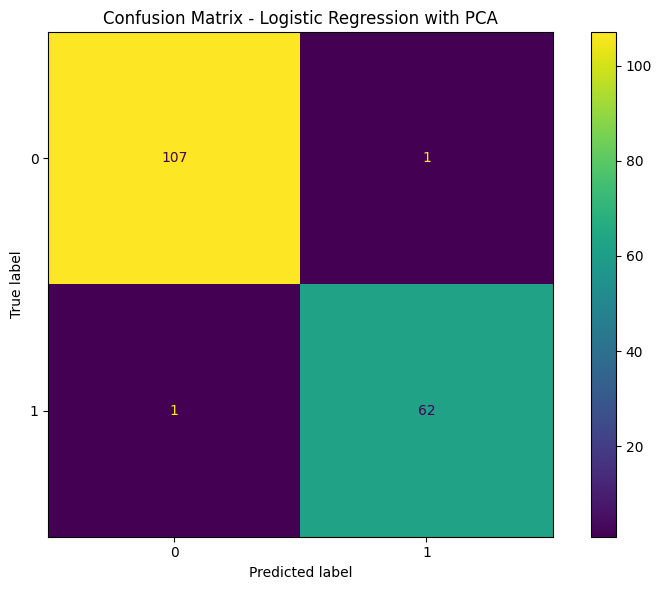



Mean F1: 0.9622896824742785


In [58]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import mlflow
import numpy as np
import matplotlib.pyplot as plt
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid()
plt.tight_layout()
plt.show()
print("\n")
logreg_pipeline_pca = Pipeline(steps=[
    ('pca', PCA(n_components=5)),
    ('classifier', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
logreg_pipeline_pca.fit(X_train, y_train)
y_pred = logreg_pipeline_pca.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(ax=ax)
plt.title("Confusion Matrix - Logistic Regression with PCA")
plt.tight_layout()
plt.show()
print("\n")
with mlflow.start_run(run_name="PCA"):
    cv_scores = cross_val_score(logreg_pipeline_pca, X_scaled, y, cv=5, scoring='f1')
    mean_f1 = np.mean(cv_scores)
    mlflow.log_metric("mean_f1_score", mean_f1)
    print("Mean F1:", mean_f1)


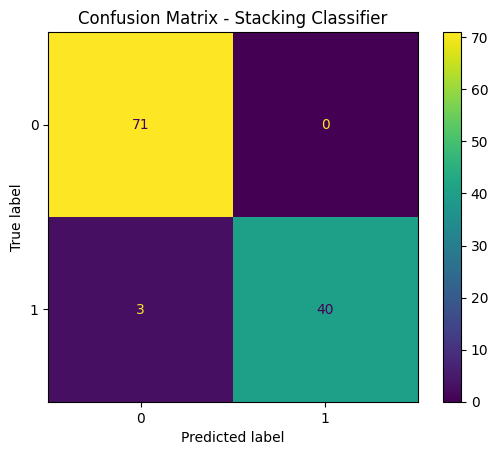

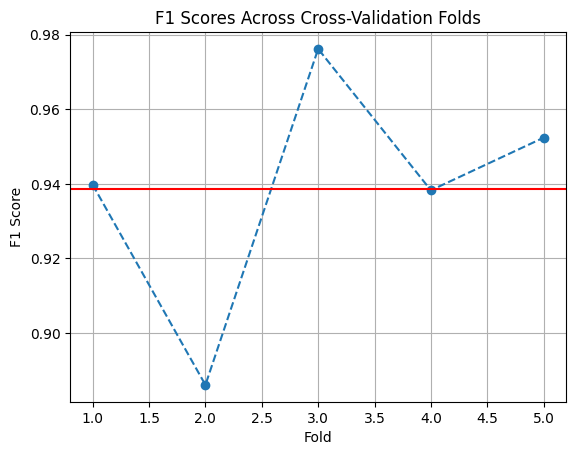



Mean F1: 0.9385356038042735


In [59]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import mlflow
import numpy as np
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]
stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
stack_clf.fit(X_train, y_train)
y_pred = stack_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix - Stacking Classifier")
plt.show()
print("\n")
with mlflow.start_run(run_name="Ensemble_Stacking"):
    cv_scores = cross_val_score(stack_clf, X_imputed, y, cv=5, scoring='f1')
    mean_f1 = np.mean(cv_scores)
    mlflow.log_metric("mean_f1_score", mean_f1)
    plt.figure()
    plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--')
    plt.axhline(y=mean_f1, color='r', linestyle='-')
    plt.title("F1 Scores Across Cross-Validation Folds")
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.grid()
    plt.show()
    print("\n")
    print("Mean F1:", mean_f1)


<Figure size 800x600 with 0 Axes>

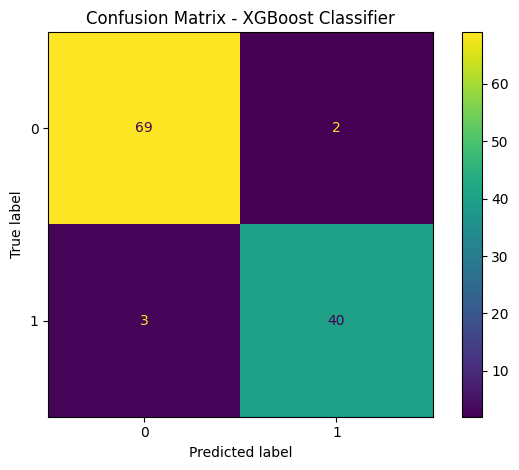

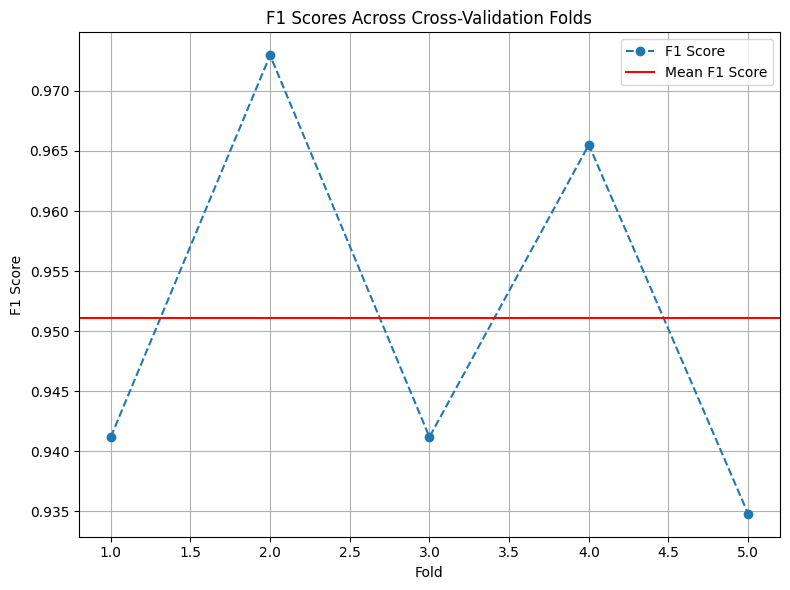


Mean F1: 0.9511251528448813


In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
import mlflow
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix - XGBoost Classifier")
plt.tight_layout()
plt.show()
print("\n")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []
for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgb_clf.fit(X_train_cv, y_train_cv)
    y_val_pred = xgb_clf.predict(X_val_cv)
    f1 = f1_score(y_val_cv, y_val_pred)
    cv_scores.append(f1)
mean_f1 = np.mean(cv_scores)
with mlflow.start_run(run_name="XGBoost"):
    mlflow.log_metric("mean_f1_score", mean_f1)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', label="F1 Score")
    plt.axhline(y=mean_f1, color='r', linestyle='-', label="Mean F1 Score")
    plt.title("F1 Scores Across Cross-Validation Folds")
    plt.xlabel("Fold")
    plt.ylabel("F1 Score")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    print("\nMean F1:", mean_f1)


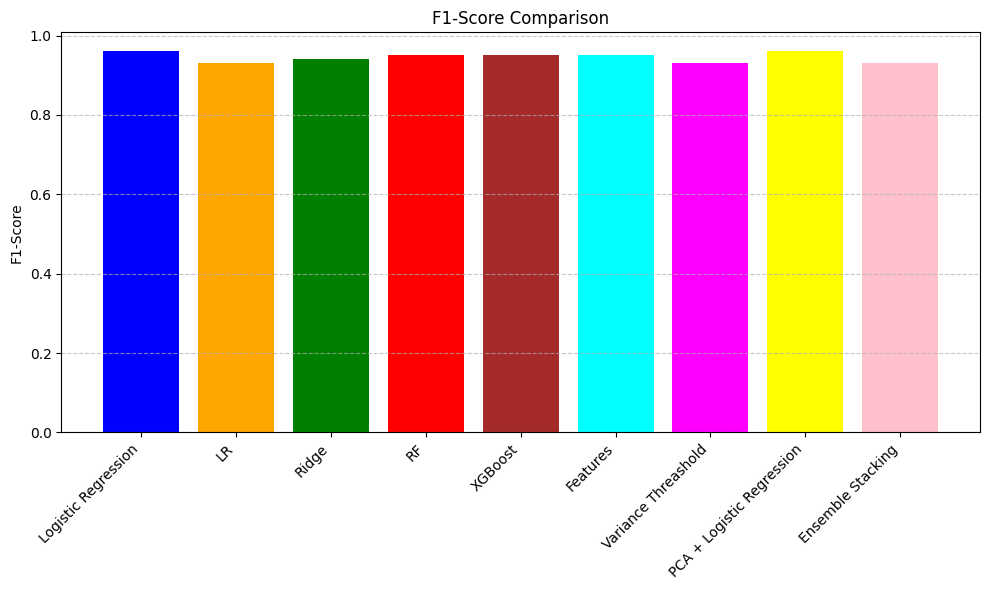

In [61]:
import matplotlib.pyplot as plt
experiments = ["Logistic Regression","LR","Ridge","RF","XGBoost","Features","Variance Threashold","PCA + Logistic Regression","Ensemble Stacking","XGBoost"]
f1_scores = [0.96,0.93,0.94,0.95,0.93,0.95,0.93,0.96,0.93,0.95]
plt.figure(figsize=(10, 6))
plt.bar(experiments, f1_scores, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan', 'magenta', 'yellow', 'pink', 'brown'])
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
